# Importer les différents modules nécessaire

In [1]:
import csv
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import table 

# Ouverture des fichiers csv

In [2]:
remorq_data = pandas.read_csv("remorquages.csv", delimiter=",")

nbplaces_data = pandas.read_csv("stationnements_h2017-2018.csv", delimiter=",")

# Calcul et opération sur les fichiers

In [3]:
sum_place = nbplaces_data['NBR_PLA'].sum()

count_arrondissement = nbplaces_data ["ARROND"].nunique()
moyenne_place = round(sum_place/count_arrondissement,2)
nb_remorquage = len(remorq_data)
nb_place_par_arrond = nbplaces_data[["NBR_PLA","ARROND"]].groupby("ARROND").sum()
deplacement_na = remorq_data.loc[remorq_data["MOTIF_REMORQUAGE"] == "Déplacement non autorisé", "DATE_ORIGINE"].count()
nb_remorq_arrondissement = remorq_data[["DATE_ORIGINE","ARRONDISSEMENT_ORIGINE"]].groupby("ARRONDISSEMENT_ORIGINE").count()
stat_4 = int(deplacement_na / count_arrondissement) 
deplacement_na_condition = remorq_data["MOTIF_REMORQUAGE"] == "Déplacement non autorisé"
deplacement_na_par_arrondissement = remorq_data[["ARRONDISSEMENT_ORIGINE","MOTIF_REMORQUAGE"]]
deplacement_na_par_arrondissement = deplacement_na_par_arrondissement[deplacement_na_condition].groupby("ARRONDISSEMENT_ORIGINE").count()




# Les différents impression des statistiques

In [4]:
print("Le nombre de place par arrondissement est : ", nb_place_par_arrond)
print( "La moyenne des places par arrondissement est de ", moyenne_place)
print("Le nombre d'arrondissement avec places incitatives : ", count_arrondissement)
print(" ")
print("Le nombre de remorquage par arrondissement est : ", nb_remorq_arrondissement)
print("  ")
print("La nombre de déplacement moyen par arrondissement", stat_4)
print("Le nombre de remorquages est de :", nb_remorquage )
print("le nombre de déplacement non autorisé est de :" , deplacement_na)
print("les déplacements non autorisés par arrondissement sont", deplacement_na_par_arrondissement)



Le nombre de place par arrondissement est :                                            NBR_PLA
ARROND                                           
Ahunstic-Cartierville                          22
LaSalle                                       280
Le Plateau-Mont-Royal                         316
Le Sud-Ouest                                  758
Mercier - Hochelaga-Maisonneuve               485
Outremont                                     182
Rosemont - La Petite-Patrie                   947
Saint-Léonard                                1433
Ville-Marie                                   791
Villeray - Saint-Michel - Parc-Extension      134
La moyenne des places par arrondissement est de  534.8
Le nombre d'arrondissement avec places incitatives :  10
 
Le nombre de remorquage par arrondissement est :                                              DATE_ORIGINE
ARRONDISSEMENT_ORIGINE                                  
Ahuntsic - Cartierville                            16165
Anjou               

# CREATION DU TABLEAU

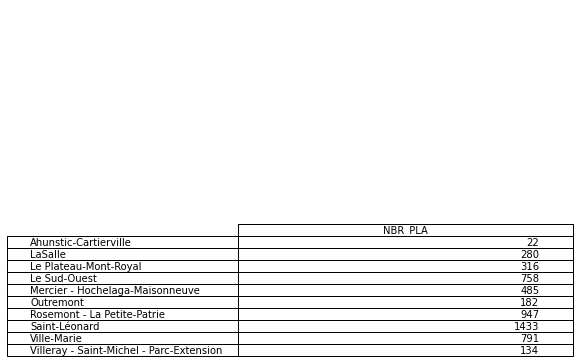

In [5]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, nb_place_par_arrond )  

plt.savefig('mytable.png')

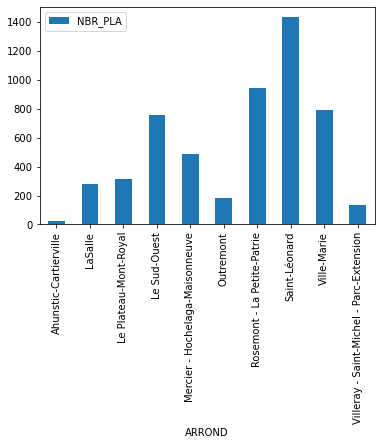

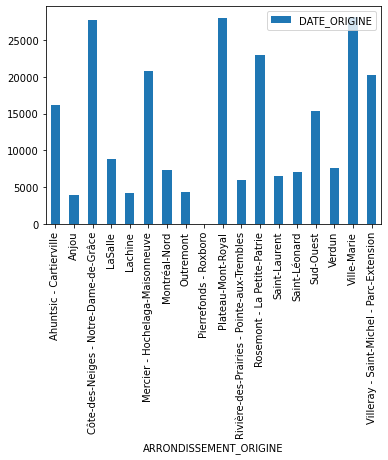

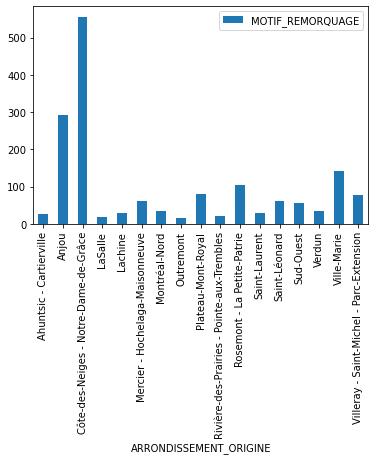

In [6]:
nb_place_par_arrond.plot(kind='bar')
nb_remorq_arrondissement.plot(kind='bar')
deplacement_na_par_arrondissement.plot(kind='bar')

plt.show()